In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

(x_train, _), (x_test, _) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train_flat = x_train.reshape(len(x_train), 784)
x_test_flat = x_test.reshape(len(x_test), 784)

n = 10

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.4988 - val_loss: 0.3436
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.3342 - val_loss: 0.3183
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.3127 - val_loss: 0.3070
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.3028 - val_loss: 0.3000
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.2965 - val_loss: 0.2955
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.2920 - val_loss: 0.2929
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.2904 - val_loss: 0.2907
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.2883 - val_loss: 0.2894
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 0.2869 - val_loss: 0.2888
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.2862 - val_loss: 0.2879
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.2863 - val_loss: 0.2875
Epoch 12/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms

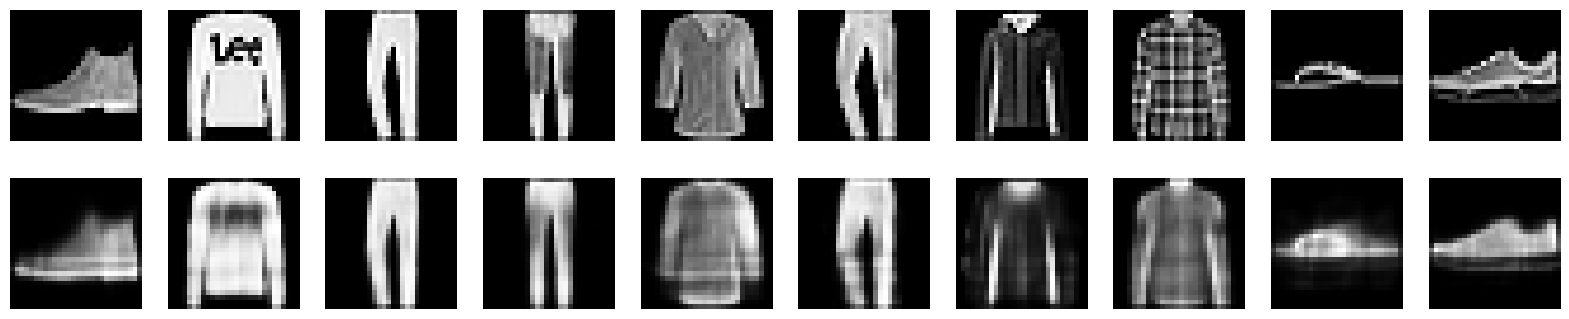

In [ ]:
encoding_dim = 32
input_img = tf.keras.Input(shape=(784,))
encoded = tf.keras.layers.Dense(encoding_dim, activation='relu')(input_img)
decoded = tf.keras.layers.Dense(784, activation='sigmoid')(encoded)

autoencoder = tf.keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(x_train_flat, x_train_flat,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_flat, x_test_flat))

decoded_imgs = autoencoder.predict(x_test_flat)

plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_flat[i].reshape(28, 28), cmap='gray')
    ax.axis('off')

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    ax.axis('off')
plt.show()


Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.6351 - val_loss: 0.4630
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.4488 - val_loss: 0.4113
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.4040 - val_loss: 0.3916
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.3869 - val_loss: 0.3808
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.3763 - val_loss: 0.3728
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.3690 - val_loss: 0.3666
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.3638 - val_loss: 0.3626
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.3596 - val_loss: 0.3597
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.3572 - val_loss: 0.3579
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.3560 - val_loss: 0.3566
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.3539 - val_loss: 0.3550
Epoch 12/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12m

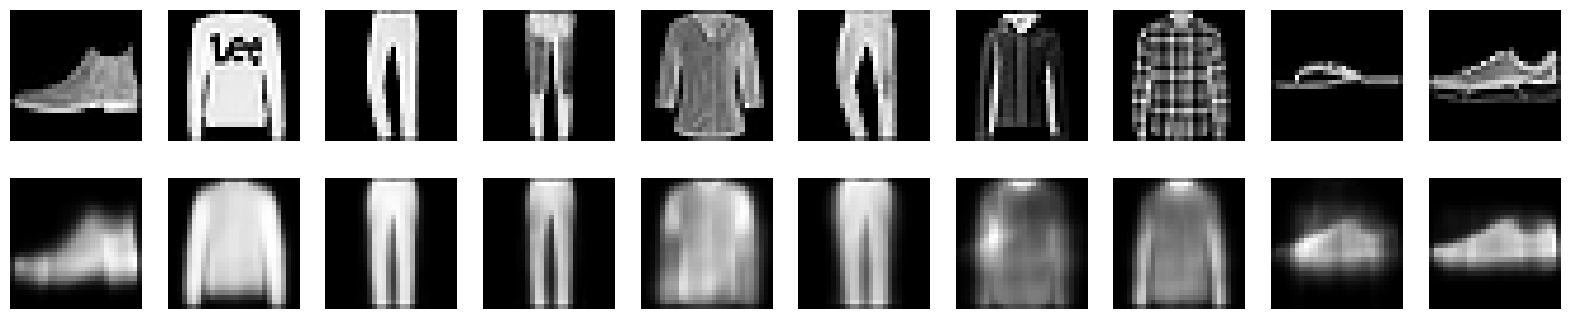

In [ ]:
encoding_dim = 32
input_img = tf.keras.Input(shape=(784,))
encoded = tf.keras.layers.Dense(encoding_dim, activation='relu',
                                activity_regularizer=tf.keras.regularizers.l1(1e-5))(input_img)
decoded = tf.keras.layers.Dense(784, activation='sigmoid')(encoded)

sparse_autoencoder = tf.keras.Model(input_img, decoded)
sparse_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

sparse_autoencoder.fit(x_train_flat, x_train_flat,
                      epochs=50,
                      batch_size=256,
                      shuffle=True,
                      validation_data=(x_test_flat, x_test_flat))

decoded_imgs = sparse_autoencoder.predict(x_test_flat)

plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_flat[i].reshape(28, 28), cmap='gray')
    ax.axis('off')

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    ax.axis('off')
plt.show()


Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.5163 - val_loss: 0.3736
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.3594 - val_loss: 0.3407
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.3360 - val_loss: 0.3304
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.3268 - val_loss: 0.3258
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.3227 - val_loss: 0.3227
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.3188 - val_loss: 0.3200
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.3161 - val_loss: 0.3168
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.3138 - val_loss: 0.3150
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 0.3124 - val_loss: 0.3132
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.3099 - val_loss: 0.3118
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.3080 - val_loss: 0.3106
Epoch 12/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11m

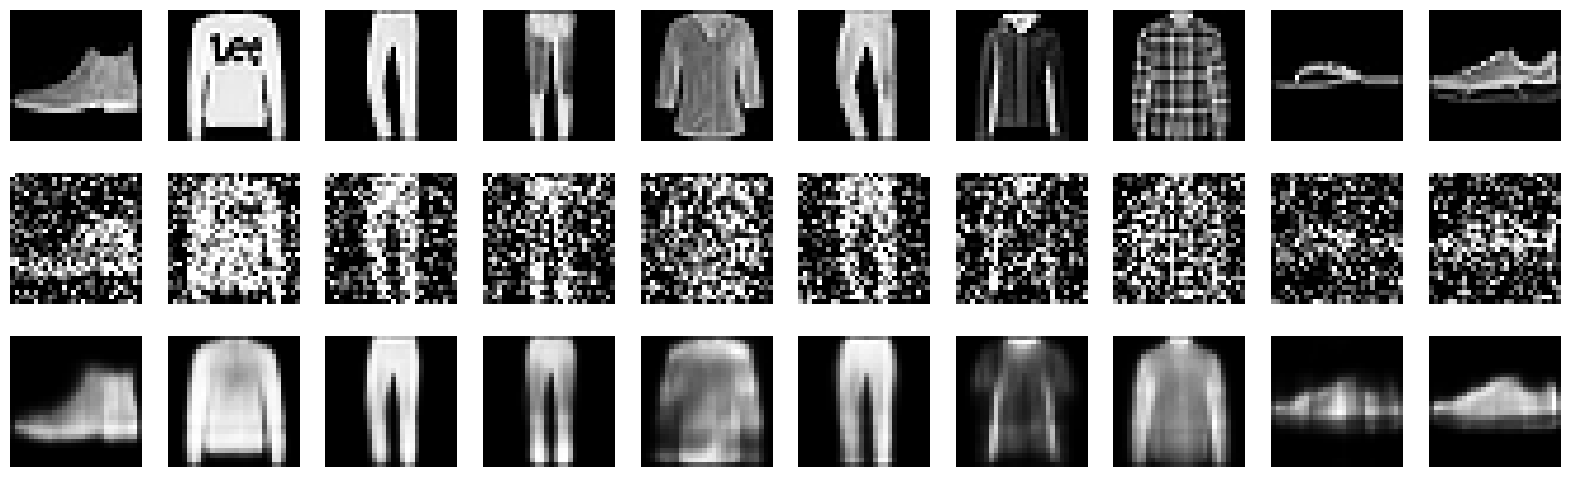

In [ ]:
encoding_dim = 32
input_img = tf.keras.Input(shape=(784,))
encoded = tf.keras.layers.Dense(encoding_dim, activation='relu')(input_img)
decoded = tf.keras.layers.Dense(784, activation='sigmoid')(encoded)

denoising_autoencoder = tf.keras.Model(input_img, decoded)
denoising_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

noise_factor = 0.5
x_train_noisy = x_train_flat + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train_flat.shape)
x_test_noisy = x_test_flat + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test_flat.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

denoising_autoencoder.fit(x_train_noisy, x_train_flat,
                         epochs=50,
                         batch_size=256,
                         shuffle=True,
                         validation_data=(x_test_noisy, x_test_flat))

decoded_imgs = denoising_autoencoder.predict(x_test_noisy)

plt.figure(figsize=(20, 6))
for i in range(n):
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test_flat[i].reshape(28, 28), cmap='gray')
    ax.axis('off')

    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap='gray')
    ax.axis('off')

    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    ax.axis('off')
plt.show()


Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.5240 - val_loss: 0.3619
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.3504 - val_loss: 0.3344
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 0.3283 - val_loss: 0.3217
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.3180 - val_loss: 0.3152
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.3112 - val_loss: 0.3103
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.3081 - val_loss: 0.3071
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.3043 - val_loss: 0.3048
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.3023 - val_loss: 0.3033
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.3006 - val_loss: 0.3025
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.3000 - val_loss: 0.3017
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.2992 - val_loss: 0.3013
Epoch 12/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms

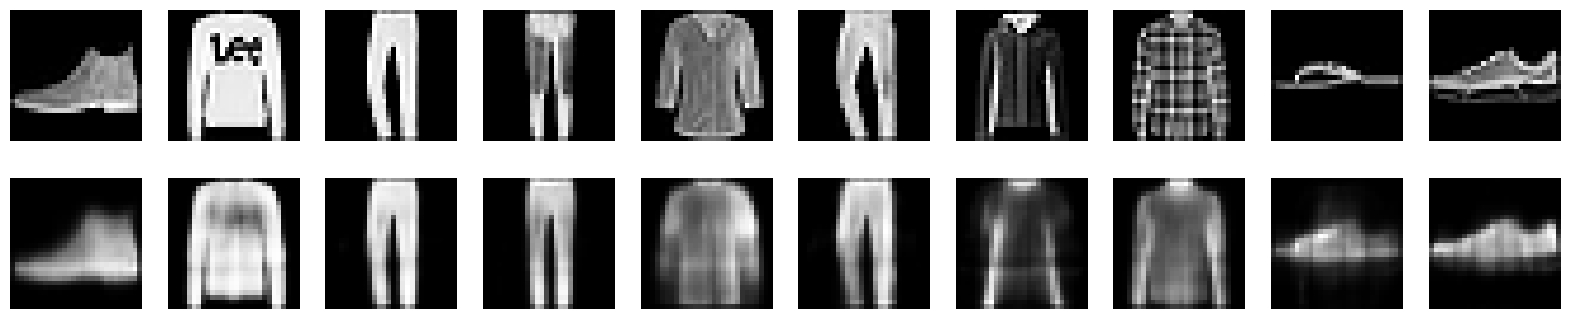

In [ ]:
encoding_dim = 16
input_img = tf.keras.Input(shape=(784,))
encoded = tf.keras.layers.Dense(encoding_dim, activation='relu')(input_img)
decoded = tf.keras.layers.Dense(784, activation='sigmoid')(encoded)

undercomplete_autoencoder = tf.keras.Model(input_img, decoded)
undercomplete_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

undercomplete_autoencoder.fit(x_train_flat, x_train_flat,
                             epochs=50,
                             batch_size=256,
                             shuffle=True,
                             validation_data=(x_test_flat, x_test_flat))

decoded_imgs = undercomplete_autoencoder.predict(x_test_flat)

plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_flat[i].reshape(28, 28), cmap='gray')
    ax.axis('off')

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    ax.axis('off')
plt.show()


Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - loss: 0.4988 - val_loss: 0.3460
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.3360 - val_loss: 0.3204
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.3150 - val_loss: 0.3095
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.3046 - val_loss: 0.3013
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.2975 - val_loss: 0.2964
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.2940 - val_loss: 0.2933
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.2912 - val_loss: 0.2915
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.2891 - val_loss: 0.2900
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.2876 - val_loss: 0.2890
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.2867 - val_loss: 0.2877
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.2859 - val_loss: 0.2872
Epoch 12/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s

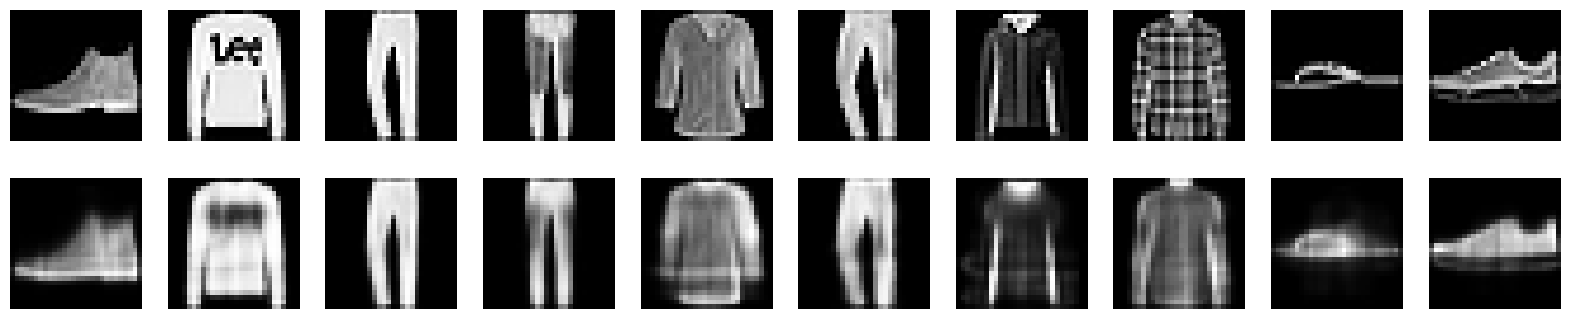

In [ ]:
encoding_dim = 32
input_img = tf.keras.Input(shape=(784,))
encoded = tf.keras.layers.Dense(encoding_dim, activation='relu')(input_img)
decoded = tf.keras.layers.Dense(784, activation='sigmoid')(encoded)

contractive_autoencoder = tf.keras.Model(input_img, decoded)

def contractive_loss(y_true, y_pred):
    mse = tf.keras.losses.mean_squared_error(y_true, y_pred)
    W = contractive_autoencoder.layers[1].kernel
    dh = tf.gradients(contractive_autoencoder.layers[1].output, input_img)[0]
    contractive = tf.reduce_sum(tf.square(W)) * tf.reduce_sum(tf.square(dh))
    return mse + 1e-4 * contractive

contractive_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

contractive_autoencoder.fit(x_train_flat, x_train_flat,
                           epochs=50,
                           batch_size=256,
                           shuffle=True,
                           validation_data=(x_test_flat, x_test_flat))

decoded_imgs = contractive_autoencoder.predict(x_test_flat)

plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_flat[i].reshape(28, 28), cmap='gray')
    ax.axis('off')

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    ax.axis('off')
plt.show()


Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 58s 236ms/step - loss: 0.4869 - val_loss: 0.2954
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 61s 262ms/step - loss: 0.2896 - val_loss: 0.2848
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 78s 244ms/step - loss: 0.2814 - val_loss: 0.2814
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 59s 252ms/step - loss: 0.2782 - val_loss: 0.2786
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 81s 249ms/step - loss: 0.2759 - val_loss: 0.2768
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 82s 251ms/step - loss: 0.2739 - val_loss: 0.2752
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 82s 251ms/step - loss: 0.2732 - val_loss: 0.2741
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 62s 262ms/step - loss: 0.2707 - val_loss: 0.2732
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 80s 253ms/step - loss: 0.2704 - val_loss: 0.2726
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 59s 253ms/step - loss: 0.2702 - val_loss: 0.2719
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 82s 254ms/step - loss: 0.2699 - val_loss: 0.2712
Epoch 12/50
235/235

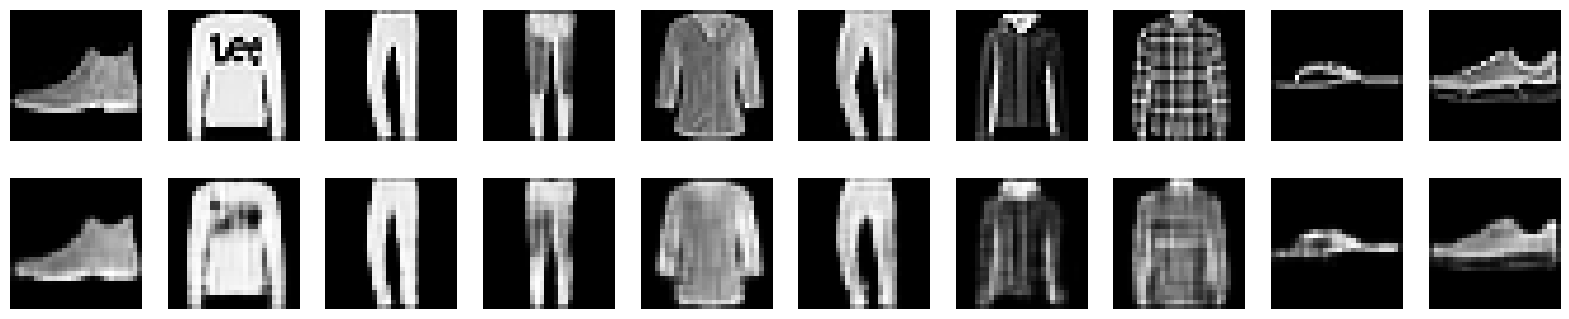

In [ ]:
input_img = tf.keras.Input(shape=(28, 28, 1))

x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)

x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
decoded = tf.keras.layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

conv_autoencoder = tf.keras.Model(input_img, decoded)
conv_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

x_train_cnn = x_train.reshape(-1, 28, 28, 1)
x_test_cnn = x_test.reshape(-1, 28, 28, 1)

conv_autoencoder.fit(x_train_cnn, x_train_cnn,
                     epochs=50,
                     batch_size=256,
                     shuffle=True,
                     validation_data=(x_test_cnn, x_test_cnn))

decoded_imgs = conv_autoencoder.predict(x_test_cnn)

plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_cnn[i].reshape(28, 28), cmap='gray')
    ax.axis('off')

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    ax.axis('off')
plt.show()


In [ ]:
x_train_cnn = x_train.reshape(-1, 28, 28, 1)
x_test_cnn = x_test.reshape(-1, 28, 28, 1)

latent_dim = 2

encoder_inputs = tf.keras.Input(shape=(28, 28, 1))
x = tf.keras.layers.Conv2D(32, 3, activation='relu', strides=2, padding='same')(encoder_inputs)
x = tf.keras.layers.Conv2D(64, 3, activation='relu', strides=2, padding='same')(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(16, activation='relu')(x)
z_mean = tf.keras.layers.Dense(latent_dim)(x)
z_log_var = tf.keras.layers.Dense(latent_dim)(x)

def sampling(args):
    z_mean, z_log_var = args
    epsilon = tf.random.normal(shape=(tf.shape(z_mean)[0], latent_dim))
    return z_mean + tf.exp(0.5 * z_log_var) * epsilon

z = tf.keras.layers.Lambda(sampling)([z_mean, z_log_var])

decoder_inputs = tf.keras.Input(shape=(latent_dim,))
x = tf.keras.layers.Dense(7*7*64, activation='relu')(decoder_inputs)
x = tf.keras.layers.Reshape((7, 7, 64))(x)
x = tf.keras.layers.Conv2DTranspose(64, 3, strides=2, padding='same', activation='relu')(x)
x = tf.keras.layers.Conv2DTranspose(32, 3, strides=2, padding='same', activation='relu')(x)
decoder_outputs = tf.keras.layers.Conv2DTranspose(1, 3, padding='same', activation='sigmoid')(x)

encoder = tf.keras.Model(encoder_inputs, [z_mean, z_log_var, z], name='encoder')
decoder = tf.keras.Model(decoder_inputs, decoder_outputs, name='decoder')

outputs = decoder(encoder(encoder_inputs)[2])
vae = tf.keras.Model(encoder_inputs, outputs, name='vae')

reconstruction_loss = tf.keras.losses.binary_crossentropy(tf.keras.backend.flatten(encoder_inputs), tf.keras.backend.flatten(outputs))
reconstruction_loss *= 28*28
kl_loss = 1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var)
kl_loss = tf.reduce_sum(kl_loss, axis=-1)
kl_loss *= -0.5
vae_loss = tf.reduce_mean(reconstruction_loss + kl_loss)
vae.add_loss(vae_loss)
vae.compile(optimizer='adam')

vae.fit(x_train_cnn, epochs=50, batch_size=256, validation_data=(x_test_cnn, None))

decoded_imgs = vae.predict(x_test_cnn)

plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_cnn[i].reshape(28, 28), cmap='gray')
    ax.axis('off')

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    ax.axis('off')
plt.show()
